# **Introduction** </br>

Color Detection in its simplest form is when an application is given an image, the user can select a color on the image and the color name as well as the RBG value will be outputed. This type of application seems trival for humans, however it is not straightforward for computers. Computers do not have the ability to identitfy colors like humans do with light receptors and transmited signals. 

I chose color detection as my final project topic because of its flexibility and adaptability to other applications. It can be used in many ways including object recognition, image editing softwares as well as drawing tools and apps. Also, as someone who works with designing marketing a lot for my leadership position on campus, I found myself wishing I had this application so I could color match my images with my text. 

The objective of my project is, given an image, to output a color name and its RGB value of a specific pixel from the image. To assist with pixel locating, I have linked some helpful sites that I used to identify pixel information of an image.

Helpful Links:</br>
Identify Image Pixels: https://yangcha.github.io/iview/iview.html </br> 
Confirm RGB Color: http://www.javascripter.net/faq/rgbtohex.htm

# **Methods**
**Image Reading and Proccessing:**</br> 
The project design begins with first uploading an image from file. You can chose any image you currently have stored in your computer. After we have uploaded our desired image we are going to use the PIL (Python Imaging Library) to open the photo and extract the RGB values from a specific pixel of the image. Using 'getpixel' it returns a tuple of (R,G,B) values which we will later use. 

**Reading the CSV File:** </br>
As stated in the midterm report, this is the dataset I will be using for this project: https://github.com/codebrainz/color-names/blob/master/output/colors.csv. We will read in this csv file using pandas. 

**Get Color Name Method:** </br> 
getColorName(R,G,B): </br>
Params - R: Red value; G: Green Value; B: Blue Value </br> 
Returns - Color name associated with the RGB value

**Displaying Results:**
We will first display the image uploaded by the user for reference. The using the previously calculated RGB values we can call our getColorName method and print out the color name. We will also display the individual RGB values. 



In [1]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))

Saving colorfulbuilding.jpeg to colorfulbuilding.jpeg


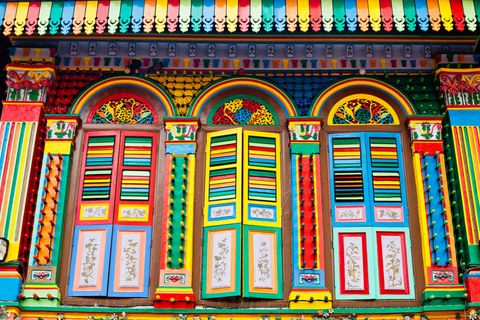

Rich Electric Blue
R:  0
G:  154
B:  221


In [2]:
import cv2
import numpy as np
import pandas as pd
from skimage import io
import PIL
from google.colab.patches import cv2_imshow

#Reading the image
img = PIL.Image.open(filename)
img_rgb = img.convert("RGB")
#Insert pixel coordinates here to find its color information
rgb_pixel_value = img_rgb.getpixel((468,119))

#Reading csv file and giving names to each column
index=["color","color_name","hex","R","G","B"]
url = 'https://raw.githubusercontent.com/codebrainz/color-names/master/output/colors.csv'
csv = pd.read_csv(url, names=index, header=None)

#function to calculate minimum distance from all colors and get the closest matching color name from dataset
def getColorName(R,G,B):
    minimum = 10000
    for i in range(len(csv)):
        d = abs(R- int(csv.loc[i,"R"])) + abs(G- int(csv.loc[i,"G"]))+ abs(B- int(csv.loc[i,"B"]))
        if(d<=minimum):
            minimum = d
            cname = csv.loc[i,"color_name"]
    return cname

#Display User's Image        
img=cv2.imread(filename, 1)
cv2_imshow(img)
name = getColorName(rgb_pixel_value[0],rgb_pixel_value[1], rgb_pixel_value[2])
print(name)
print("R: ",rgb_pixel_value[0])
print("G: ",rgb_pixel_value[1])
print("B: ",rgb_pixel_value[2])

# **Results**

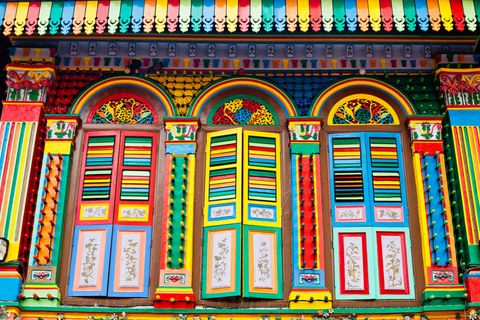

Image Link: https://drive.google.com/file/d/1rJnFlmdb9gIbh7JUGRGmfXrL87V31YiY/view?usp=sharing </br> 

Given pixel coordinates (13, 11), the results are as follows: </br> 
Color Name: Peach (Crayola) </br> 
R:  255, G:  192, B:  165 </br>

Given pixel coordinates (468, 119), the results are as follows: </br> 
Color Name: Rich Electric Blue </br> 
R:  0, G:  154, B:  221 </br>

*Use links given in introduction to identify pixels in the image

# **Discussion**

The limitations of my project include out-of-bounds pixel coordinates. My project currently does not have a means of ensuring that the pixel coordinates being inputed are within bounds of the image uploaded so the output of an out-of-bound pixel value is unknown. Another limitation may occur if the image uploaded is very grainy or pixelated. There may be an unaccurate read of the color due to the poor quality image. 

Future works for this project may include user input to allow users to directly request a specific pixel coordinate and those paramaters can be utlized in the code to detect the color. Currently, the pixels need to be manually changed in the code in order to find its color information. This is not ideal and would be the first addition. I would also like to utlize this color detection project in future projects like object detection. A simple example would be to detect a blue square from a photo. 


# **Ethic issues in artificial intelligence**

Artificial Intelligence and how it affects employment has been a rising concern ever since corporations and their business models began prioritizing efficiency. Grocery stores and supermarkets are a prime example of this. If we step into a Walmart, their self-checkout is always guaranteed to be on full operation while there may be only one or two of their registers open out of the 15-20 that exist. UB has even begun implementing their own self-checkout systems on campus, reducing the number student workers they’d need to hire. In big-name cities like New York City and Chicago, we’ve even seen fully automated stores that have no checkout line at all, like the Amazon Go cashier-less stores. It makes sense why corporations are beginning to automate their businesses. It raises efficiency, reduces labor costs, and increases profit. The for-profit economy that we live in tends to disregard any concerns that may arise when the shift to a fully AI operated business model. 

When we discuss ways to combat the unemployment caused by AI, an easy answer would be to train and employ more people in the AI technology field. Instead of working in those low-skill labor jobs they would be building the technology that would soon take over those jobs. The solution looks simple on paper – we take those who are going to lose their jobs and simply employ them into a different field of study. However, this solution cannot be discussed without bringing up the ethics issues that arise from it. Employing people in the AI technology field is not a simple task. Those who are about to lose their jobs would then need to go back to school and get certification in AI Technology whether that is at a college, university or bootcamp. But what happens to those who cannot afford to go back to school? This solution detrimentally affects low class workers who are unable to switch professions. The shift to AI Technology has a serious equality issue where those who are financially stable continue to succeed while those who are not continue to suffer. 

An (unreasonable) solution to this could be for large corporations like the Big-N companies to create programs that financially supports low class workers while they get their certification in AI Technology. I say this is unreasonable because these companies do what they do because it makes them money. Frankly, they do not care what happens when they fully automate their companies. If people lose their jobs, they will still continue to increase profit and that’s all that matters to them. 



